<a href="https://colab.research.google.com/github/phanimusunuri1234/c2c-assignment/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("/content/data_banknote_authentication.csv",
               names=["VARIANCE","SKEWNESS","CURTOSIS","ENTROPY","CLASS"])

In [3]:
from matplotlib import pyplot as plt

In [ ]:
df

,VARIANCE,SKEWNESS,CURTOSIS,ENTROPY,CLASS
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df.describe()

,VARIANCE,SKEWNESS,CURTOSIS,ENTROPY,CLASS
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
import seaborn as sns

In [ ]:
corr=df.corr()

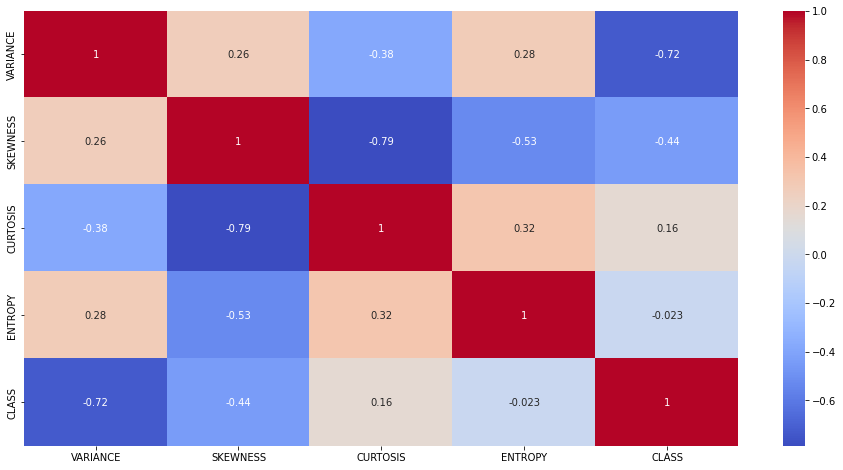

In [ ]:
plt.subplots(figsize=(16,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

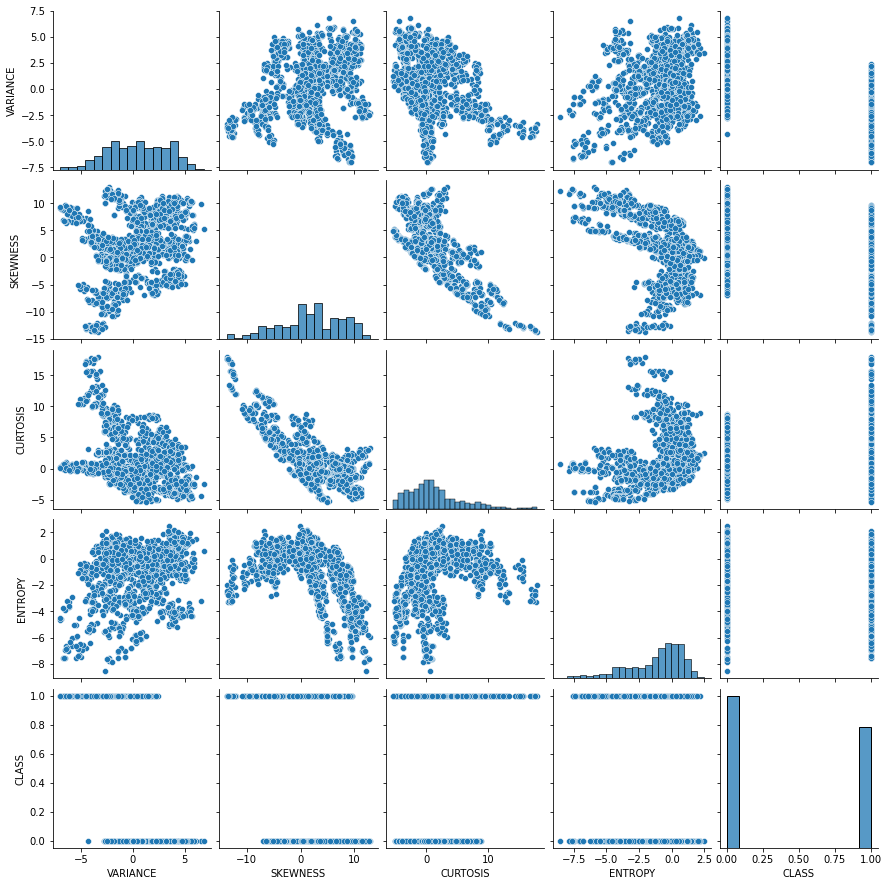

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.drop("CLASS",axis=1)
y=df["CLASS"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1097, 4)
(275, 4)
(1097,)
(275,)


In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
df["CLASS"].unique()

array([0, 1])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred.shape

(275,)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.99      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
print(confusion_matrix(y_test,y_pred))

[[156   1]
 [  1 117]]


In [ ]:
print(accuracy_score(y_test,y_pred))

0.9927272727272727


In [ ]:
# decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

98.54545454545455


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[156   1]
 [  0 118]]


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

99.63636363636364


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
plot_tree(dt,feature_names=["VARIANCE","SKEWNESS","CURTOSIS","ENTROPY","CLASS"])

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
plt.savefig('out2.pdf')

Text(0, 0.5, 'CLASS')

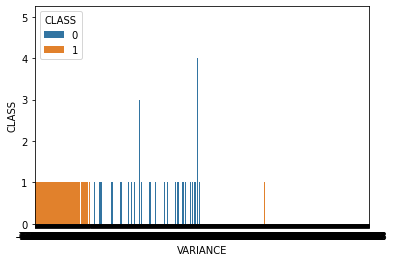

In [ ]:
a= sns.countplot(x='VARIANCE',hue="CLASS",data=df)
a.set_ylabel("CLASS")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


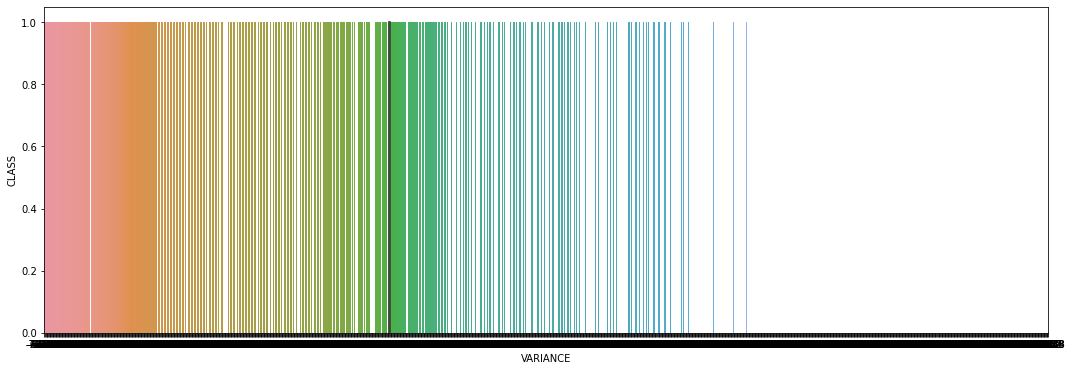

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(df['VARIANCE'],df['CLASS'])
plt.show()

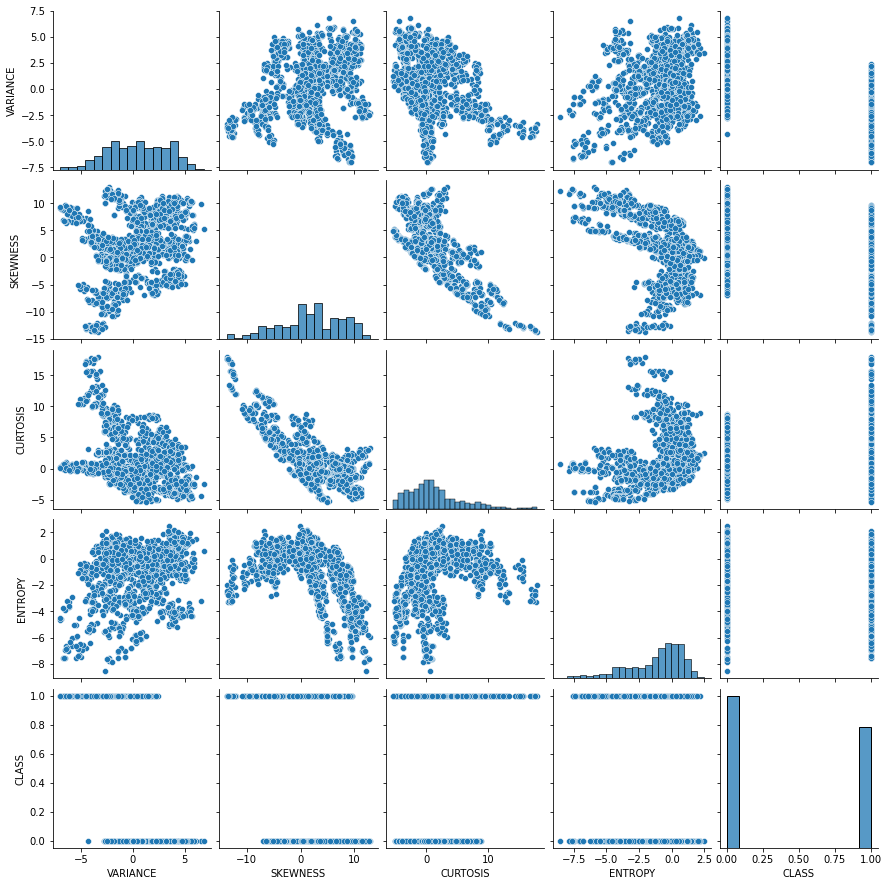

In [ ]:
sns.pairplot(df)

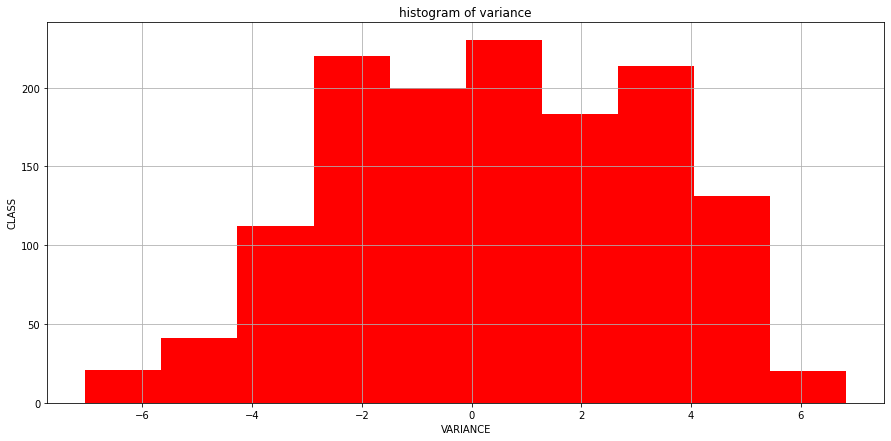

In [ ]:
df.VARIANCE.hist(color='red',figsize=(15,7))
plt.title('histogram of variance')
plt.xlabel('VARIANCE')
plt.ylabel('CLASS')
plt.savefig("hist_VARIANCE")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

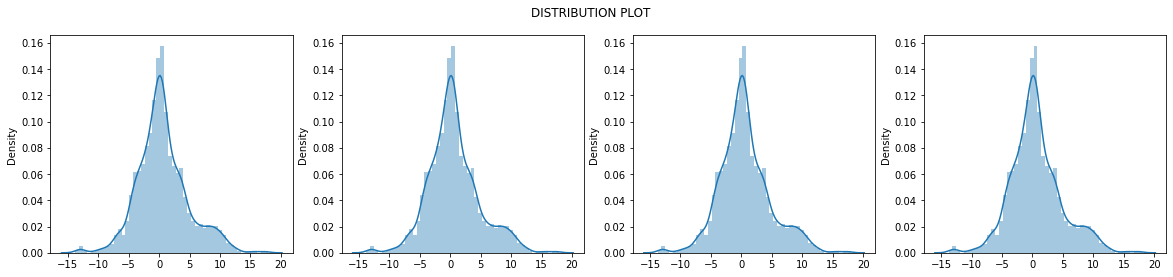

In [5]:
feature_col=df.drop(['CLASS'],axis=1).columns
fig, ax=plt.subplots(ncols=4,figsize=(20,4))
fig.suptitle("DISTRIBUTION PLOT")
for index,column in enumerate(feature_col):
  sns.distplot(df[feature_col],ax=ax[index])

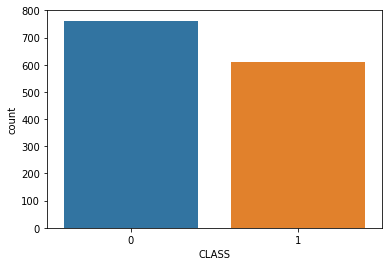

In [ ]:
sns.countplot(x=df["CLASS"])

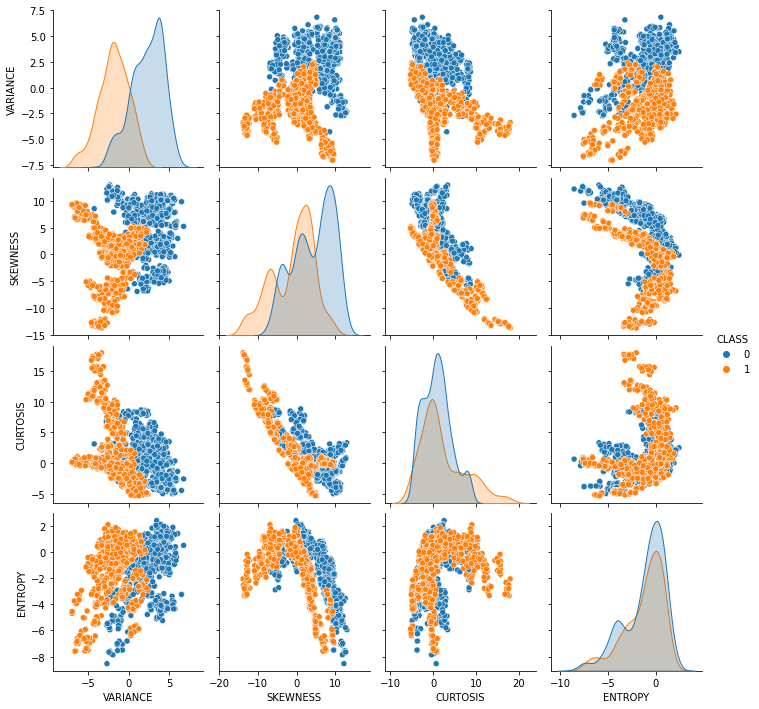

In [ ]:
plot=sns.pairplot(df,hue="CLASS")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


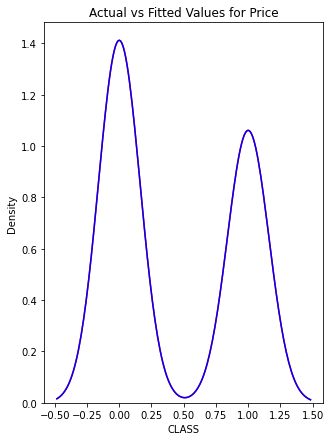

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

In [7]:
coloumns=list(df.columns)
coloumns.remove('CLASS')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

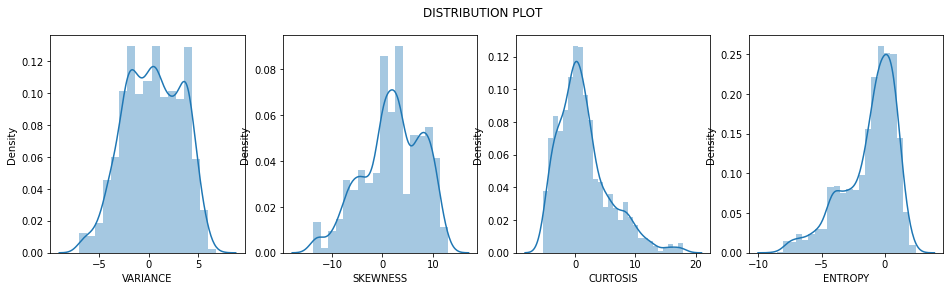

In [8]:
fig,ax=plt.subplots(ncols=4,figsize=(16,4))
fig.suptitle("DISTRIBUTION PLOT")
for index,column in enumerate(coloumns):
  sns.distplot(df[column],ax=ax[index])